In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [11]:
import yfinance as yf
df = yf.download("DOGE-USD", start="2020-01-01", end="2024-12-31")

C:\Users\ACER\AppData\Local\Temp\ipykernel_21368\3385781352.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("DOGE-USD", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


## Prepare the data

### Subtask:
Preprocess the data for the RNN model, including scaling and creating sequences.

**Reasoning**:
Extract the 'Close' column, reshape it, scale the data, create sequences, and split into training and testing sets, then reshape for the RNN.


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Extract the 'Close' column
close_prices = df['Close'].values

# 2. Reshape the extracted data
close_prices = close_prices.reshape(-1, 1)

# 3. Initialize a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# 4. Fit the scaler and transform the data
scaled_data = scaler.fit_transform(close_prices)

# 5. Define a function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# 6. Apply the sequence creation function
time_step = 100
X, y = create_sequences(scaled_data, time_step)

# 7. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 8. Reshape for RNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1380, 100, 1)
y_train shape: (1380,)
X_test shape: (345, 100, 1)
y_test shape: (345,)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 2. Define a Sequential model
model = Sequential()

# 3. Add a SimpleRNN layer
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# 4. Add a Dense layer
model.add(Dense(units=1))

# 5. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Print a summary of the model architecture
model.summary()

c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 1. Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# 2. Print confirmation of training completion (optional)
print("Model training complete.")

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.3286e-04 
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6409e-04
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.4917e-04
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7793e-04
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8284e-04
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.2224e-04
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6506e-04
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0153e-04
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7146e-04
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.6944e-04
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.5837e-04
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


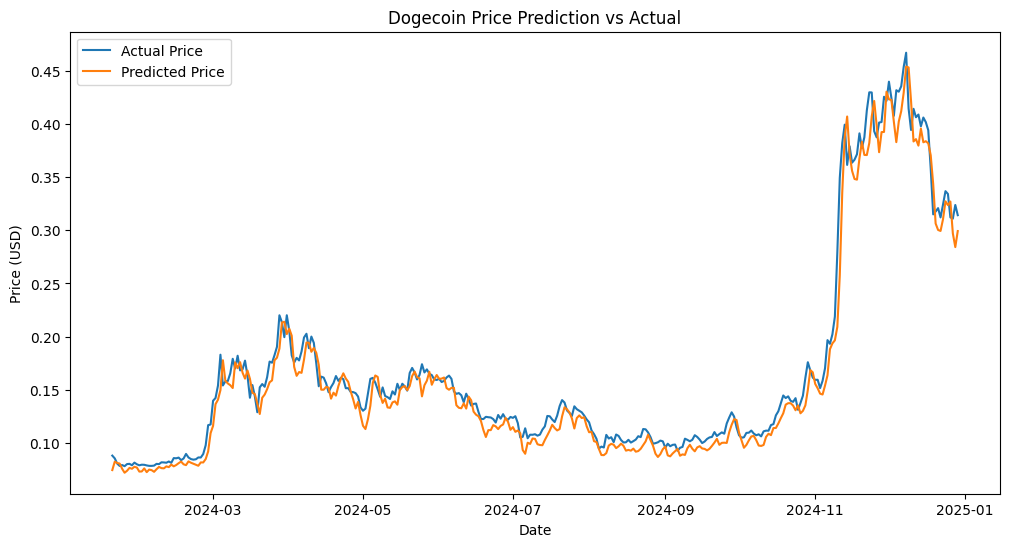

In [15]:
# 1. Use the trained model to predict values on the X_test dataset.
y_pred = model.predict(X_test)

# 2. Inverse transform both the y_test and y_pred values back to their original scale.
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# 3. Create a time index for the y_test and y_pred data.
# The original index is 'Date' from the dataframe 'df'.
# The test set starts after the training set and accounts for the time_step.
test_index_start = len(df) - len(y_test) - 1 # Account for the last element used as target and the time_step
time_index_test = df.index[test_index_start:test_index_start + len(y_test_actual)]


# 4. Plot the original y_test (actual) values against the predicted y_pred (predicted) values over time.
plt.figure(figsize=(12, 6))
plt.plot(time_index_test, y_test_actual, label='Actual Price')
plt.plot(time_index_test, y_pred_actual, label='Predicted Price')

# 5. Add appropriate labels to the x-axis and y-axis.
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# 6. Add a title to the plot.
plt.title('Dogecoin Price Prediction vs Actual')

# 7. Include a legend.
plt.legend()

# 8. Display the plot.
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


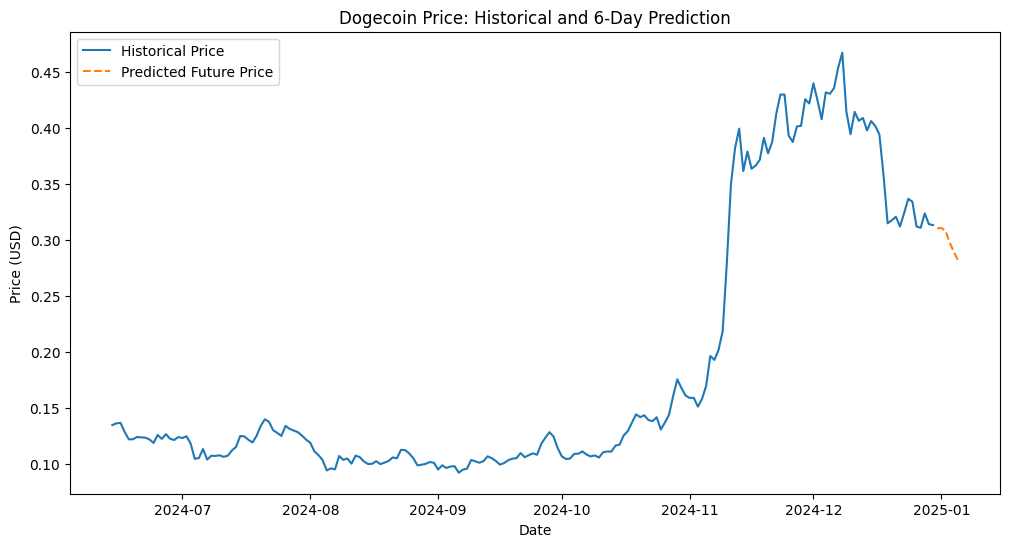


Predicted Dogecoin prices for the next 6 days:
2024-12-31: 0.310389 USD
2025-01-01: 0.310943 USD
2025-01-02: 0.308604 USD
2025-01-03: 0.298440 USD
2025-01-04: 0.289828 USD
2025-01-05: 0.282383 USD


In [16]:
# Get the last 'time_step' data points from the scaled data
last_time_step_data = scaled_data[-time_step:]

# Reshape the data to match the model's input shape
last_time_step_data = last_time_step_data.reshape(1, time_step, 1)

# Predict the next 6 days (changed from 5 to 6)
predicted_future_prices = []
current_batch = last_time_step_data

for i in range(6): # Changed loop range from 5 to 6
    # Predict the next data point
    next_prediction = model.predict(current_batch)

    # Append the prediction to the results list
    predicted_future_prices.append(next_prediction[0, 0])

    # Update the current batch for the next prediction
    # Remove the first data point and add the new prediction
    current_batch = np.append(current_batch[:, 1:, :], next_prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the predicted future prices
predicted_future_prices_actual = scaler.inverse_transform(np.array(predicted_future_prices).reshape(-1, 1))

# Create a time index for the future predictions
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=7, freq='D')[1:] # Exclude the last_date itself and add one more day for 6 predictions

# Combine the historical data with the future predictions for plotting
# Use a portion of the historical data for context
historical_data_for_plot = df['Close'][-200:] # Adjust the number of historical data points as needed

# Plot the historical data and the future predictions
plt.figure(figsize=(12, 6))
plt.plot(historical_data_for_plot.index, historical_data_for_plot.values, label='Historical Price')
plt.plot(future_dates, predicted_future_prices_actual, label='Predicted Future Price', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Dogecoin Price: Historical and 6-Day Prediction') # Changed title to 6-Day Prediction
plt.legend()
plt.show()

# Display the predicted future prices
print("\nPredicted Dogecoin prices for the next 6 days:") # Changed print message to 6 days
for date, price in zip(future_dates, predicted_future_prices_actual):
    print(f"{date.strftime('%Y-%m-%d')}: {price[0]:.6f} USD")

In [17]:
import plotly.graph_objects as go
import pandas as pd # Import pandas

# Create a combined DataFrame for easier plotting
combined_df = pd.DataFrame({
    'Historical Price': historical_data_for_plot.values.flatten(), # Flatten the historical data
    'Predicted Future Price': np.nan  # Initialize with NaN for historical data
}, index=historical_data_for_plot.index)

future_df = pd.DataFrame({
    'Historical Price': np.nan,  # Initialize with NaN for future predictions
    'Predicted Future Price': predicted_future_prices_actual.flatten()
}, index=future_dates)

combined_df = pd.concat([combined_df, future_df])


fig = go.Figure()

# Add historical price trace
fig.add_trace(go.Scatter(x=combined_df.index, y=combined_df['Historical Price'],
                         mode='lines',
                         name='Historical Price'))

# Add predicted future price trace
fig.add_trace(go.Scatter(x=combined_df.index, y=combined_df['Predicted Future Price'],
                         mode='lines',
                         name='Predicted Future Price',
                         line=dict(dash='dash')))

# Update layout for better visualization
fig.update_layout(
    title='Dogecoin Price: Historical and 6-Day Prediction',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True
)

fig.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_21368\2017336593.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([combined_df, future_df])
